# Physics 512 -  Problem Set 5

Kit M. Gerodias

In [1]:
#[ IMPORT Modules ]

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams #learning to use rcParams
import h5py
import glob
from scipy import signal
from scipy.ndimage import gaussian_filter
import json
import readligo as rl

# Event: GW150914

In [2]:
#[ GW150914 Data: Hanford, Livingston, template ]

#simple_read_ligo.py


def read_template(filename):
    dataFile=h5py.File(filename,'r')
    template=dataFile['template']
    th=template[0]
    tl=template[1]
    return th,tl
def read_file(filename):
    dataFile=h5py.File(filename,'r')
    dqInfo = dataFile['quality']['simple']
    qmask=dqInfo['DQmask'][...]

    meta=dataFile['meta']
    #gpsStart=meta['GPSstart'].value
    gpsStart=meta['GPSstart'][()]
    #print meta.keys()
    #utc=meta['UTCstart'].value
    utc=meta['UTCstart'][()]
    #duration=meta['Duration'].value
    duration=meta['Duration'][()]
    #strain=dataFile['strain']['Strain'].value
    strain=dataFile['strain']['Strain'][()]
    dt=(1.0*duration)/len(strain)

    dataFile.close()
    return strain,dt,utc



#fnames=glob.glob("[HL]-*.hdf5")
#fname=fnames[0]
fname_H='LOSC_Event_tutorial\H-H1_LOSC_4_V2-1126259446-32.hdf5'
print('reading file ',fname_H)
H_strain,H_dt,H_utc=read_file(fname_H)

#th,tl=read_template('GW150914_4_template.hdf5')
template_name='LOSC_Event_tutorial\GW150914_4_template.hdf5'
th,tl=read_template(template_name)

fname_L='LOSC_Event_tutorial\L-L1_LOSC_4_V2-1126259446-32.hdf5'
print('reading file ',fname_L)
L_strain,L_dt,L_utc=read_file(fname_L)

#spec,nu=measure_ps(strain,do_win=True,dt=dt,osamp=16)
#strain_white=noise_filter(strain,numpy.sqrt(spec),nu,nu_max=1600.,taper=5000)

#th_white=noise_filter(th,numpy.sqrt(spec),nu,nu_max=1600.,taper=5000)
#tl_white=noise_filter(tl,numpy.sqrt(spec),nu,nu_max=1600.,taper=5000)


#matched_filt_h=numpy.fft.irfft(numpy.fft.rfft(strain_white)*numpy.conj(numpy.fft.rfft(th_white)))
#matched_filt_l=numpy.fft.irfft(numpy.fft.rfft(strain_white)*numpy.conj(numpy.fft.rfft(tl_white)))




#copied from bash from class
# strain2=np.append(strain,np.flipud(strain[1:-1]))
# tobs=len(strain)*dt
# k_true=np.arange(len(myft))*dnu

reading file  H-H1_LOSC_4_V2-1126259446-32.hdf5
reading file  L-L1_LOSC_4_V2-1126259446-32.hdf5


In [4]:
H_dt == L_dt

True

In [5]:
len(H_strain) == len(L_strain)

True

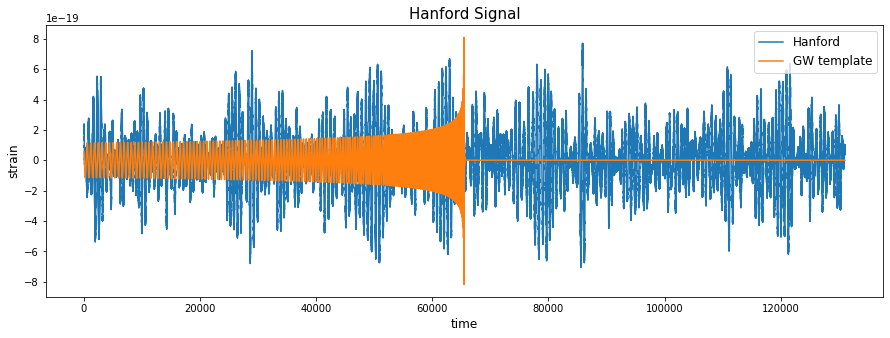

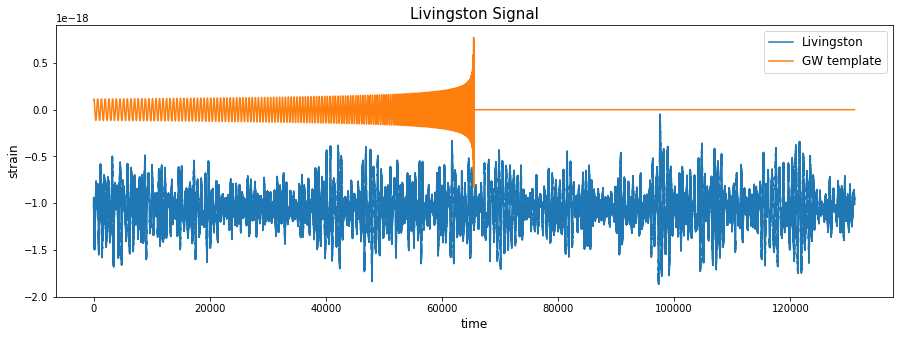

In [16]:
#plotting 
rcParams['figure.figsize'] = (15,5) 

plt.plot(H_strain, label='Hanford')
plt.plot(th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.ylabel("strain",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

plt.plot(L_strain, label='Livingston')
plt.plot(tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.ylabel("strain",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

In [21]:
def xcorr(a,b):
    aft = np.fft.rfft(a)
    bft = np.fft.rfft(b)
    return np.fft.irfft(aft*np.conj(bft))

### (a)  - (b)

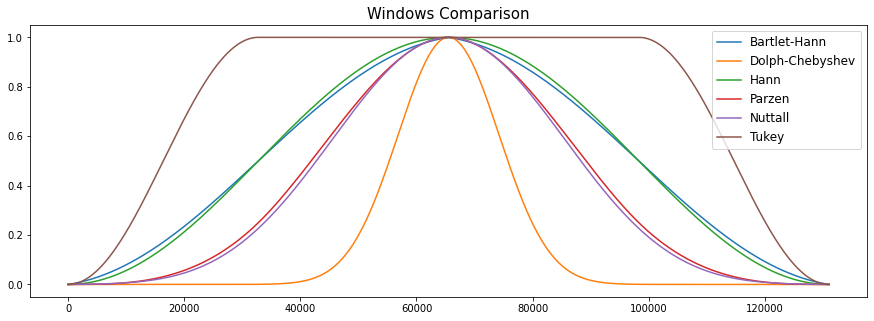

In [149]:
#Comparing different windows function

arr_len = len(H_strain)
win1 = signal.barthann(arr_len)
win2 = signal.chebwin(arr_len, at=500)
win3 = signal.hann(arr_len)
win4 = signal.parzen(arr_len)
win5 = signal.nuttall(arr_len)
win6 = signal.tukey(arr_len, alpha= 0.5)

#plotting
plt.plot(win1, label='Bartlet-Hann')
plt.plot(win2, label='Dolph-Chebyshev')
plt.plot(win3, label='Hann')
plt.plot(win4, label='Parzen')
plt.plot(win5, label='Nuttall')
plt.plot(win6, label='Tukey')
plt.title('Windows Comparison', fontsize = 15, loc='center')
plt.legend(loc = 1, fontsize = 12)
plt.show()


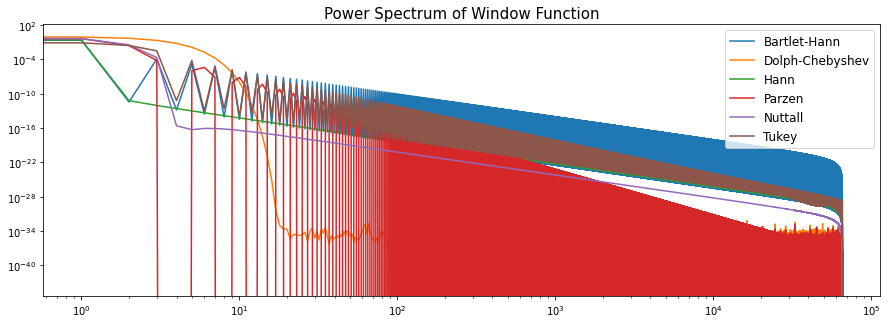

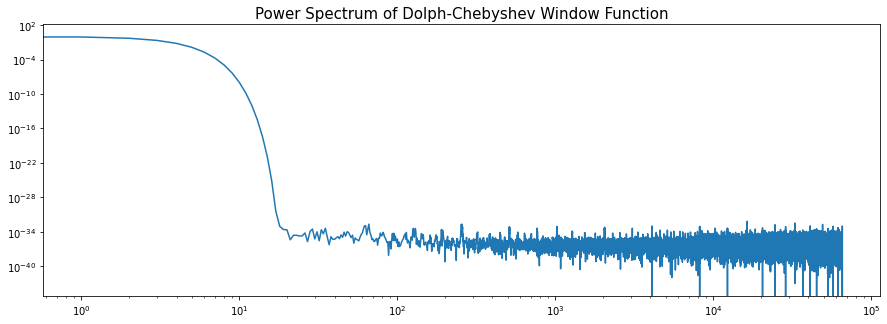

The x-axis of the graph is not scaled.


In [157]:
#Comparing different windows function

#win1_ft = np.fft.rfft(win1)
#win2_ft = np.fft.rfft(win2)
#win3_ft = np.fft.rfft(win3)
#win4_ft = np.fft.rfft(win4)
#win5_ft = np.fft.rfft(win5)
#win6_ft = np.fft.rfft(win6)

#win1_ps = np.abs(win1_ft)**2
#win2_ps = np.abs(win2_ft)**2
#win3_ps = np.abs(win3_ft)**2
#win4_ps = np.abs(win4_ft)**2
#win5_ps = np.abs(win5_ft)**2
#win6_ps = np.abs(win6_ft)**2


#plotting
plt.loglog(win1_ps/max(win1_ps), label='Bartlet-Hann')
plt.loglog(win2_ps/max(win2_ps), label='Dolph-Chebyshev')
plt.loglog(win3_ps/max(win3_ps), label='Hann')
plt.loglog(win4_ps/max(win4_ps), label='Parzen')
plt.loglog(win5_ps/max(win5_ps), label='Nuttall')
plt.loglog(win6_ps/max(win6_ps), label='Tukey')
plt.title('Power Spectrum of Window Function', fontsize = 15, loc='center')
plt.legend(loc = 1, fontsize = 12)
plt.show()

plt.loglog(win2_ps/max(win2_ps))
plt.title('Power Spectrum of Dolph-Chebyshev Window Function', fontsize = 15, loc='center')
plt.show()
print('The x-axis of the graph is not scaled.')

Dolph-Chebyshev window gives the lowest noise on the sides. 

In [376]:
#[ Calculate ]
#Determine windowed functions, power spectra of strain and template
#NOTE: win - windowed; ft - FFT; ps - power spectrum 

#Dolph-Chebyshev
window = win2
#Hanford
win_H_strain_ft = np.fft.rfft(window*H_strain)
win_th_ft = np.fft.rfft(window*th)
ps_win_H = np.abs(win_H_strain_ft)**2
ps_win_th = np.abs(win_th_ft)**2

#Livingston
win_L_strain_ft = np.fft.rfft(window*L_strain)
win_tl_ft = np.fft.rfft(window*tl)
ps_win_L = np.abs(win_L_strain_ft)**2
ps_win_tl = np.abs(win_tl_ft)**2

#smoothing

noise_H = gaussian_filter(ps_win_H, 25)
noise_L = gaussian_filter(ps_win_L, 25)
#10 is too wiggly,20 is wiggly
#100 is too broad, 50 is also broad

In [21]:
#setting for the plot
# H_dt = L_dt
nu = np.fft.rfftfreq(arr_len, H_dt) #frequency nu
t = np.arange(0, arr_len)*H_dt #time t

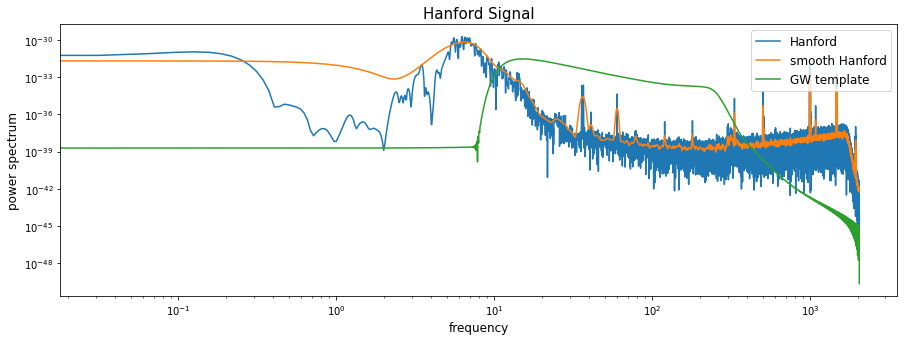

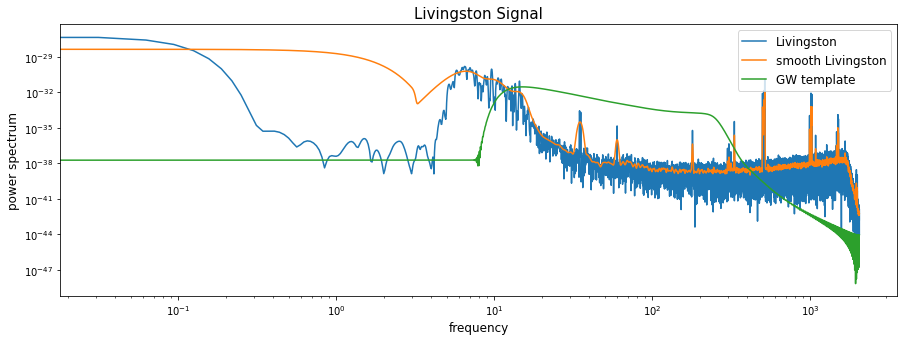

In [377]:
#plotting: noise model for both data and template

plt.loglog(nu, ps_win_H, label='Hanford')
plt.loglog(nu, noise_H, label='smooth Hanford')
plt.loglog(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

plt.loglog(nu, ps_win_L, label='Livingston')
plt.loglog(nu, noise_L, label='smooth Livingston')
plt.loglog(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

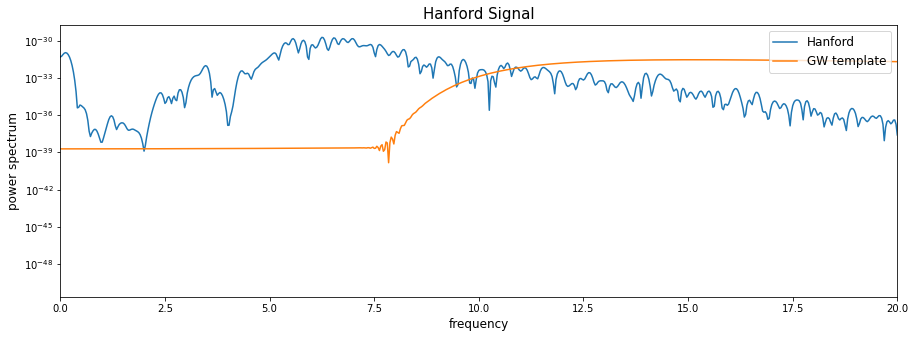

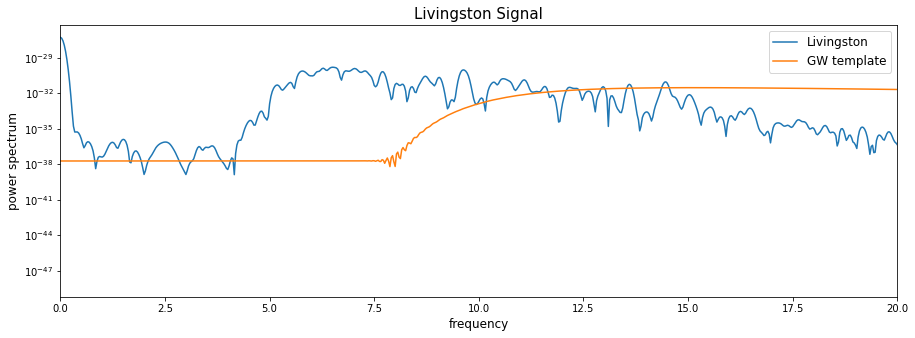

In [217]:
#plotting: finding the which to cut-off
plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(1500,2000)
plt.xlim(0,20)
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(1500,2000)
plt.xlim(0,20)
plt.show()

cutting off to between 15Hz and 1800 Hz

In [216]:
lower_freq = np.argmin(abs(nu-15))
higher_freq = np.argmin(abs(nu - 1800))
print(lower_freq)
print(higher_freq)

480
57600


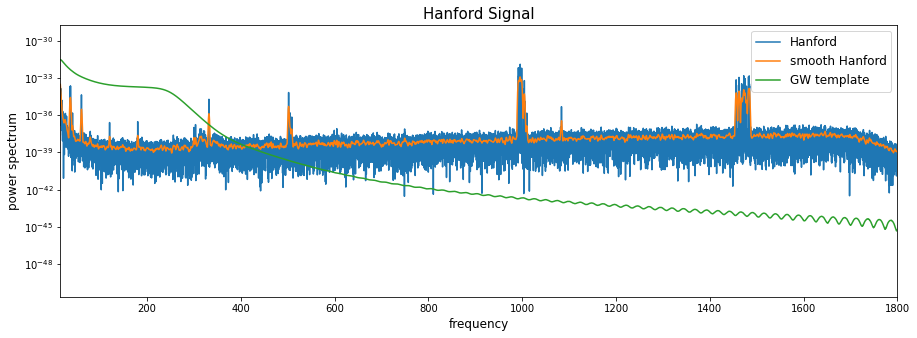

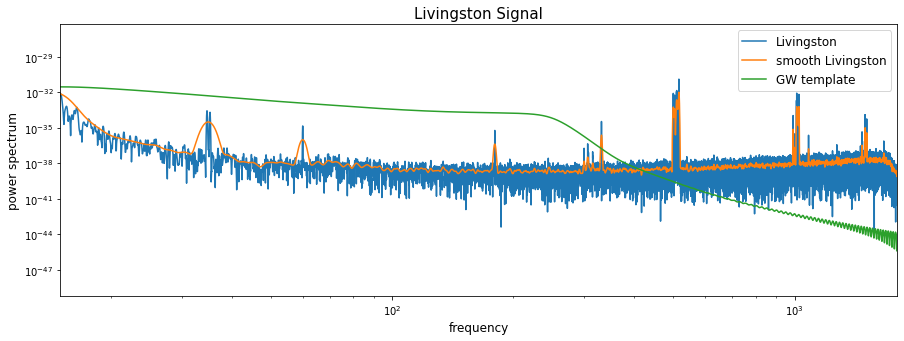

In [378]:
#plotting: cut-off
plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, noise_H, label='smooth Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.loglog(nu, noise_L, label='smooth Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

### (c)

In [382]:
#[ Whitening ]
#from class
#mf_ft = np.conj(Aft)*(dft/N)
#mf = np.fft.irfft(mf_ft)

#Hanford
#whiten
gluta_H_strain_ft = win_H_strain_ft/np.sqrt(noise_H)
gluta_th_ft = win_th_ft/np.sqrt(noise_H)
#matched filter
mf_H_ft = np.conj(gluta_th_ft).T*(gluta_H_strain_ft)
mf_H = np.fft.irfft(mf_H_ft)
abs_mf_H = np.abs(mf_H)

#Livingston
#whiten
gluta_L_strain_ft = win_L_strain_ft/np.sqrt(noise_L)
gluta_tl_ft = win_tl_ft/np.sqrt(noise_L)
#matched filter
mf_L_ft = np.conj(gluta_tl_ft).T*(gluta_L_strain_ft)
mf_L = np.fft.irfft(mf_L_ft)
abs_mf_L = np.abs(mf_L)

#gluta_H_strain = np.fft.irfft(gluta_H_strain_ft)
#gluta_th = np.fft.irfft(gluta_th_ft)
#gluta_L_strain = np.fft.irfft(gluta_L_strain_ft)
#gluta_tl = np.fft.irfft(gluta_tl_ft)

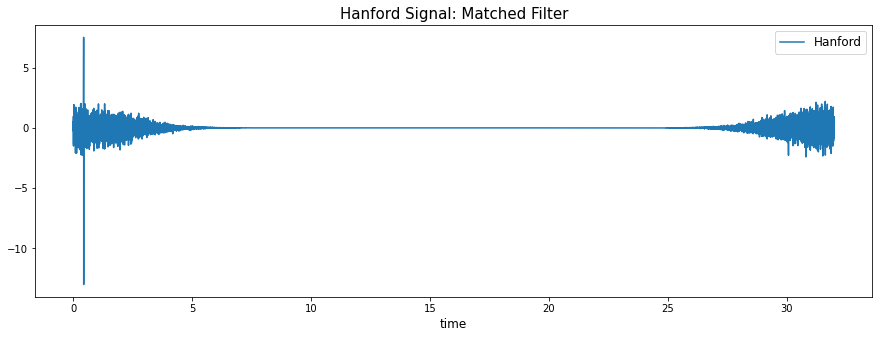

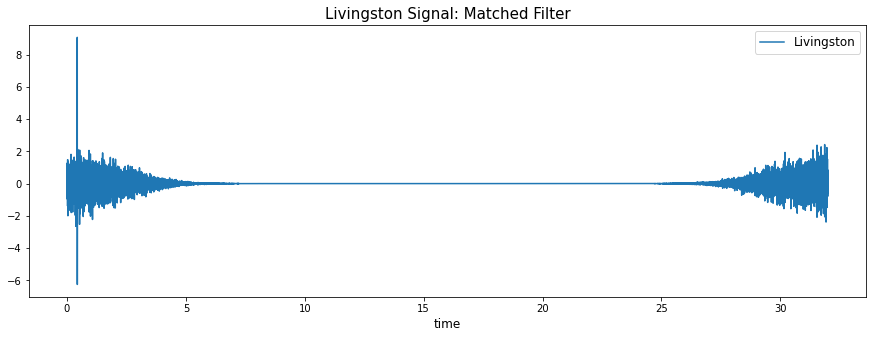

In [380]:
#plotting: matched filter
plt.plot(t, mf_H, label='Hanford')
plt.title('Hanford Signal: Matched Filter', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

plt.plot(t, mf_L, label='Livingston')
plt.title('Livingston Signal: Matched Filter', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

In [397]:
gluta_th = np.fft.irfft(gluta_th_ft, arr_len)
gluta_tl = np.fft.irfft(gluta_tl_ft, arr_len)
#noise
sig_H = np.sqrt(np.mean(gluta_th**2))
sig_L = np.sqrt(np.mean(gluta_tl**2))
#signal-to-noise ratio
snr_H = abs_mf_H/sig_H
snr_L = abs_mf_L/sig_L

print('Analytic')
print('Hanford Signal')
print("estimated noise: %.2e" % sig_H)
print("signal-to-noise ratio: %.2f" % (np.max(snr_H)))
print('Livingston Signal')
print("estimated noise: %.2e" % (sig_L))
print("signal-to-noise ratio: %.2f" % (np.max(snr_L)))

Analytic
Hanford Signal
estimated noise: 2.96e-01
signal-to-noise ratio: 43.87
Livingston Signal
estimated noise: 2.79e-01
signal-to-noise ratio: 32.50


### (d)

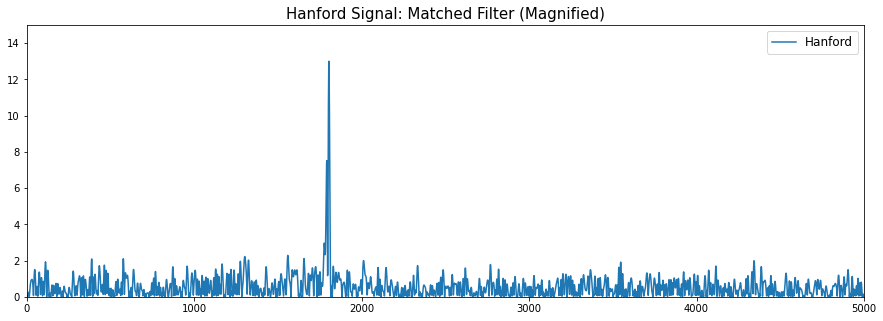

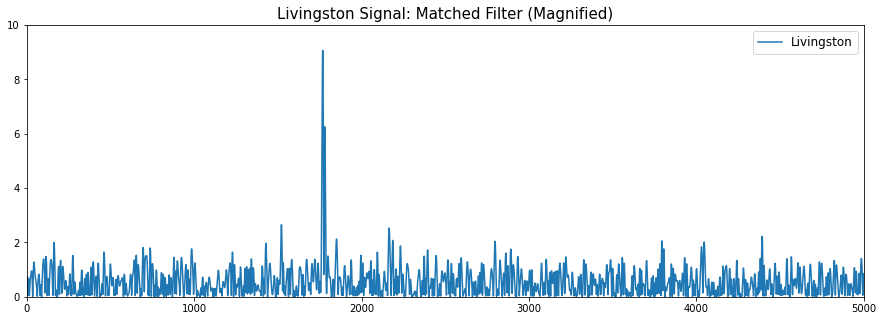

In [398]:
#plotting: matched filter
plt.plot(abs_mf_H, label='Hanford')
plt.title('Hanford Signal: Matched Filter (Magnified)', fontsize = 15, loc='center')
plt.legend(loc = 1, fontsize = 12)
plt.axis([0,5000,0,15])
plt.show()

plt.plot(abs_mf_L, label='Livingston')
plt.title('Livingston Signal: Matched Filter (Magnified)', fontsize = 15, loc='center')
plt.legend(loc = 1, fontsize = 12)
plt.axis([0,5000,0,10])
plt.show()

In [489]:
#Scatter
#taking the rms from 2000 to 5000 (after the signal)

scat_sig_H = np.std(mf_H[2000:5000])
scat_sig_L = np.std(mf_L[2000:5000])

scat_snr_H = abs_mf_H/scat_sig_H
scat_snr_L = abs_mf_L/scat_sig_L

print('Scatter')
print('Hanford Signal')
print("estimated noise: %.2e" % scat_sig_H)
print("signal-to-noise ratio: %.2f" % (np.max(scat_snr_H)))
print('Livingston Signal')
print("estimated noise: %.2e" % (scat_sig_L))
print("signal-to-noise ratio: %.2f" % (np.max(scat_snr_L)))

Scatter
Hanford Signal
estimated noise: 6.32e-01
signal-to-noise ratio: 20.56
Livingston Signal
estimated noise: 7.05e-01
signal-to-noise ratio: 12.87


The SNR and noise in both cases vary by more than a factor of two. 

### (e)

In [450]:
#power spectrum of whitened template
ps_gluta_th = np.abs(gluta_th_ft)**2
ps_gluta_tl = np.abs(gluta_tl_ft)**2
cum_ps_gluta_th = np.cumsum(ps_gluta_th)
cum_ps_gluta_tl = np.cumsum(ps_gluta_tl)
#Finding the half
H_half_nu_index = np.argwhere(cum_ps_gluta_th>=((np.max(cum_ps_gluta_th)-np.min(cum_ps_gluta_th))/2))[0][0]
L_half_nu_index = np.argwhere(cum_ps_gluta_tl>=((np.max(cum_ps_gluta_tl)-np.min(cum_ps_gluta_tl))/2))[0][0]
print('Half frequency (Hanford):',round(nu[H_half_nu_index]),'Hz')
print('Half frequency (Livingston):',round(nu[L_half_nu_index]),'Hz')

Half frequency (Hanford): 118.0 Hz
Half frequency (Livingston): 122.0 Hz


### (f)

From: https://www.ligo.caltech.edu/WA/page/ligo-detectors#:~:text=The%20LIGO%20%E2%80%9Cobservatory%E2%80%9D%20is%20made,3002%20km%20away%20in%20a

Distance between Hanford and Livingston: 3002 km.
This means that it takes about 0.01 s for light to travel between them.

In [473]:
#Time
arrival_H = t[np.argwhere(abs_mf_H == np.max(abs_mf_H))[0][0]]
arrival_L = t[np.argwhere(abs_mf_L == np.max(abs_mf_L))[0][0]]
time_diff = arrival_H - arrival_L
print('Arrival time difference is',round((time_diff),4),'seconds.')
print('This is about ', round(((1 - time_diff/0.01)*100),1) , '% deviation from the calculated time.')

Arrival time difference is 0.0088 seconds.
This is about  12.1 % deviation from the calculated time.


#### Codes from LOSC_Event_tutorial
These are for reading the remaining three events.

In [484]:
#-- SET ME   Tutorial should work with most binary black hole events
#-- Default is no event selection; you MUST select one to proceed.
#eventname = 'GW150914'
#eventname = 'GW151226' 
#eventname = 'LVT151012'
eventname = 'GW170104'

In [485]:

# Read the event properties from a local json file
fnjson = "LOSC_Event_tutorial\BBH_events_v3.json"
try:
    events = json.load(open(fnjson,"r"))
except IOError:
    print("Cannot find resource file "+fnjson)
    print("You can download it from https://losc.ligo.org/s/events/"+fnjson)
    print("Quitting.")
    quit()

# did the user select the eventname ?
try: 
    events[eventname]
except:
    print('You must select an eventname that is in '+fnjson+'! Quitting.')
    quit()

In [487]:

# Extract the parameters for the desired event:
event = events[eventname]
fn_H1 = event['fn_H1']              # File name for H1 data
fn_L1 = event['fn_L1']              # File name for L1 data
fn_template = event['fn_template']  # File name for template waveform
fs = event['fs']                    # Set sampling rate
tevent = event['tevent']            # Set approximate event GPS time
fband = event['fband']              # frequency band for bandpassing signal
print("Reading in parameters for event " + event["name"])
print(event)

Reading in parameters for event GW151226\
{'name': 'GW151226', 'fn_H1': 'H-H1_LOSC_4_V2-1135136334-32.hdf5', 'fn_L1': 'L-L1_LOSC_4_V2-1135136334-32.hdf5', 'fn_template': 'GW151226_4_template.hdf5', 'fs': 4096, 'tevent': 1135136350.65, 'utcevent': '2015-12-26T03:38:53.65', 'm1': 19.6427, 'm2': 6.7054, 'a1': 0.3998, 'a2': -0.0396, 'approx': 'lalsim.SEOBNRv2', 'fband': [43.0, 800.0], 'f_min': 10.0}

Reading in parameters for event LVT1510127\
{'name': 'LVT151012', 'fn_H1': 'H-H1_LOSC_4_V2-1128678884-32.hdf5', 'fn_L1': 'L-L1_LOSC_4_V2-1128678884-32.hdf5', 'fn_template': 'LVT151012_4_template.hdf5', 'fs': 4096, 'tevent': 1128678900.44, 'utcevent': '2015-10-12T09:54:43.44', 'm1': 44.111, 'm2': 11.205, 'a1': 0.447, 'a2': -0.434, 'approx': 'lalsim.SEOBNRv2', 'fband': [43.0, 400.0], 'f_min': 10.0}

Reading in parameters for event GW170104\
{'name': 'GW170104', 'fn_H1': 'H-H1_LOSC_4_V1-1167559920-32.hdf5', 'fn_L1': 'L-L1_LOSC_4_V1-1167559920-32.hdf5', 'fn_template': 'GW170104_4_template.hdf5', 'fs': 4096, 'tevent': 1167559936.6, 'utcevent': '2017-01-04T10:11:58.60', 'm1': 33.64, 'm2': 24.82, 'a1': -0.236, 'a2': 0.024, 'approx': 'lalsim.SEOBNRv2', 'fband': [43.0, 800.0], 'f_min': 10.0}

# Event: GW151226

In [494]:
#[ GW151226 Data: Hanford, Livingston, template ]

#fnames=glob.glob("[HL]-*.hdf5")
#fname=fnames[0]
fname_H='LOSC_Event_tutorial\H-H1_LOSC_4_V2-1135136334-32.hdf5'
print('reading file ',fname_H)
H_strain,H_dt,H_utc=read_file(fname_H)

#th,tl=read_template('GW150914_4_template.hdf5')
template_name='LOSC_Event_tutorial\GW151226_4_template.hdf5'
th,tl=read_template(template_name)

fname_L='LOSC_Event_tutorial\L-L1_LOSC_4_V2-1135136334-32.hdf5'
print('reading file ',fname_L)
L_strain,L_dt,L_utc=read_file(fname_L)

reading file  LOSC_Event_tutorial\H-H1_LOSC_4_V2-1135136334-32.hdf5
reading file  LOSC_Event_tutorial\L-L1_LOSC_4_V2-1135136334-32.hdf5


In [499]:
print('Are arrays equivalent in length?')
print('time:',H_dt == L_dt)
print('strain:',len(H_strain) == len(L_strain))
print('')

#[ Calculate ]

#Dolph-Chebyshev
window = win2
#Hanford
win_H_strain_ft = np.fft.rfft(window*H_strain)
win_th_ft = np.fft.rfft(window*th)
ps_win_H = np.abs(win_H_strain_ft)**2
ps_win_th = np.abs(win_th_ft)**2

#Livingston
win_L_strain_ft = np.fft.rfft(window*L_strain)
win_tl_ft = np.fft.rfft(window*tl)
ps_win_L = np.abs(win_L_strain_ft)**2
ps_win_tl = np.abs(win_tl_ft)**2

#smoothing
noise_H = gaussian_filter(ps_win_H, 25)
noise_L = gaussian_filter(ps_win_L, 25)

nu = np.fft.rfftfreq(arr_len, H_dt) #frequency nu
t = np.arange(0, arr_len)*H_dt #time t

#[ Whitening and Matched Filtering ]

#Hanford
#whiten
gluta_H_strain_ft = win_H_strain_ft/np.sqrt(noise_H)
gluta_th_ft = win_th_ft/np.sqrt(noise_H)
#matched filter
mf_H_ft = np.conj(gluta_th_ft).T*(gluta_H_strain_ft)
mf_H = np.fft.irfft(mf_H_ft)
abs_mf_H = np.abs(mf_H)

#Livingston
#whiten
gluta_L_strain_ft = win_L_strain_ft/np.sqrt(noise_L)
gluta_tl_ft = win_tl_ft/np.sqrt(noise_L)
#matched filter
mf_L_ft = np.conj(gluta_tl_ft).T*(gluta_L_strain_ft)
mf_L = np.fft.irfft(mf_L_ft)
abs_mf_L = np.abs(mf_L)

gluta_th = np.fft.irfft(gluta_th_ft, arr_len)
gluta_tl = np.fft.irfft(gluta_tl_ft, arr_len)
#noise
sig_H = np.sqrt(np.mean(gluta_th**2))
sig_L = np.sqrt(np.mean(gluta_tl**2))
#signal-to-noise ratio
snr_H = abs_mf_H/sig_H
snr_L = abs_mf_L/sig_L

print('Analytic')
print('Hanford Signal')
print("estimated noise: %.2e" % sig_H)
print("signal-to-noise ratio: %.2f" % (np.max(snr_H)))
print('Livingston Signal')
print("estimated noise: %.2e" % (sig_L))
print("signal-to-noise ratio: %.2f" % (np.max(snr_L)))
print('')

#Scatter
#taking the rms from 3000 to 6000 (after the signal)

scat_sig_H = np.std(mf_H[3000:6000])
scat_sig_L = np.std(mf_L[3000:6000])

scat_snr_H = abs_mf_H/scat_sig_H
scat_snr_L = abs_mf_L/scat_sig_L

print('Scatter')
print('Hanford Signal')
print("estimated noise: %.2e" % scat_sig_H)
print("signal-to-noise ratio: %.2f" % (np.max(scat_snr_H)))
print('Livingston Signal')
print("estimated noise: %.2e" % (scat_sig_L))
print("signal-to-noise ratio: %.2f" % (np.max(scat_snr_L)))
print('')

#power spectrum of whitened template
ps_gluta_th = np.abs(gluta_th_ft)**2
ps_gluta_tl = np.abs(gluta_tl_ft)**2
cum_ps_gluta_th = np.cumsum(ps_gluta_th)
cum_ps_gluta_tl = np.cumsum(ps_gluta_tl)
#Finding the half
H_half_nu_index = np.argwhere(cum_ps_gluta_th>=((np.max(cum_ps_gluta_th)-np.min(cum_ps_gluta_th))/2))[0][0]
L_half_nu_index = np.argwhere(cum_ps_gluta_tl>=((np.max(cum_ps_gluta_tl)-np.min(cum_ps_gluta_tl))/2))[0][0]
print('Half frequency (Hanford):',round(nu[H_half_nu_index]),'Hz')
print('Half frequency (Livingston):',round(nu[L_half_nu_index]),'Hz')
print('')

#Time
arrival_H = t[np.argwhere(abs_mf_H == np.max(abs_mf_H))[0][0]]
arrival_L = t[np.argwhere(abs_mf_L == np.max(abs_mf_L))[0][0]]
time_diff = arrival_H - arrival_L
print('Arrival time difference is',round((time_diff),4),'seconds.')
print('This is about ', round(((1 - time_diff/0.01)*100),1) , '% deviation from the calculated time.')

Are arrays equivalent in length?
time: True
strain: True

Analytic
Hanford Signal
estimated noise: 1.34e-01
signal-to-noise ratio: 22.33
Livingston Signal
estimated noise: 1.00e-01
signal-to-noise ratio: 12.32

Scatter
Hanford Signal
estimated noise: 3.33e-01
signal-to-noise ratio: 8.97
Livingston Signal
estimated noise: 2.62e-01
signal-to-noise ratio: 4.72

Half frequency (Hanford): 94.0 Hz
Half frequency (Livingston): 111.0 Hz

Arrival time difference is 0.0002 seconds.
This is about  97.6 % deviation from the calculated time.


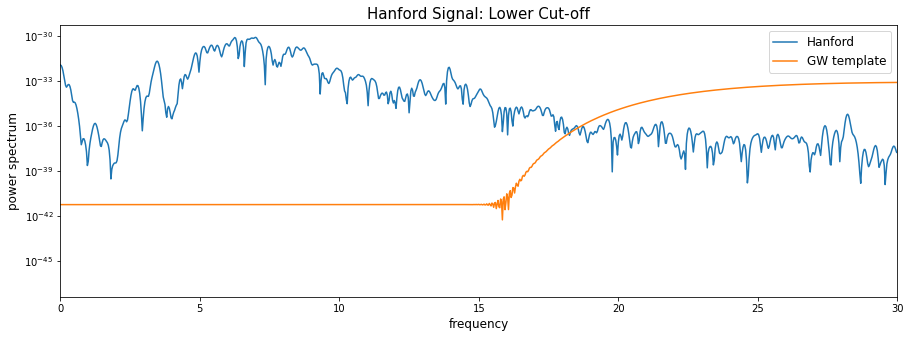

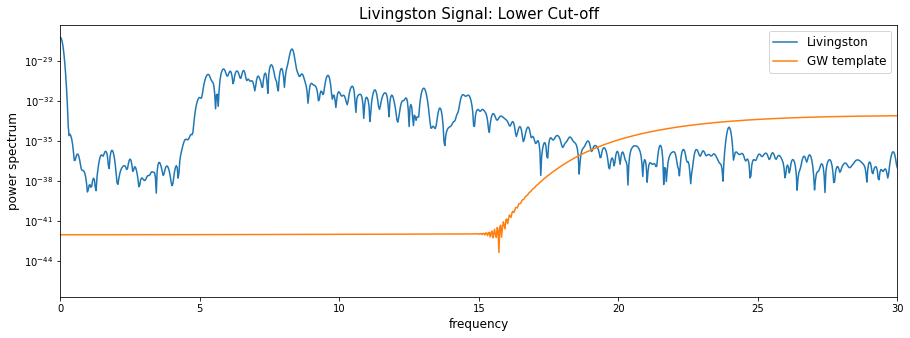

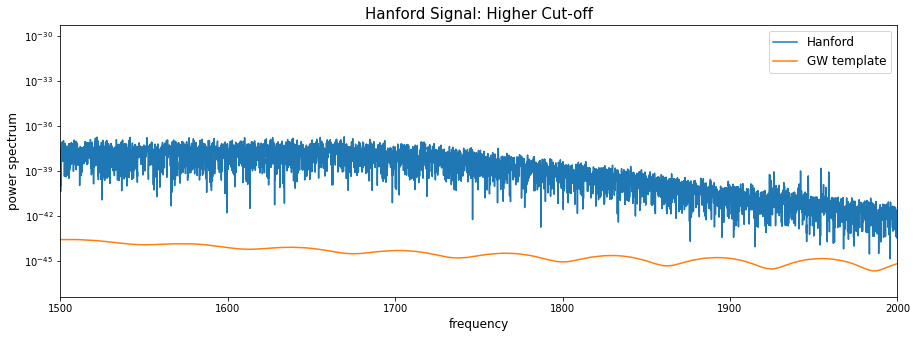

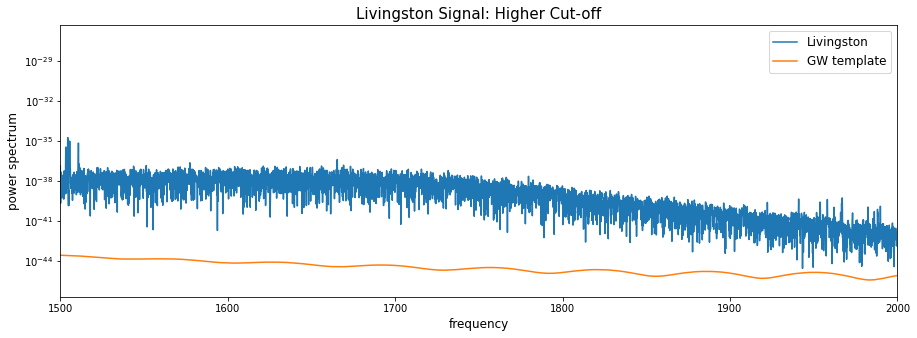

lower frequency: 640
higher frequency: 57600


In [505]:
#plotting: finding the which to cut-off
plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal: Lower Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(1500,2000)
plt.xlim(0,30)
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal: Lower Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(1500,2000)
plt.xlim(0,30)
plt.show()

plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal: Higher Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(1500,2000)
#plt.xlim(0,20)
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal: Higher Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(1500,2000)
#plt.xlim(0,20)
plt.show()
lower_freq = np.argmin(abs(nu-20))
higher_freq = np.argmin(abs(nu - 1800))
print('lower frequency:',lower_freq)
print('higher frequency:',higher_freq)

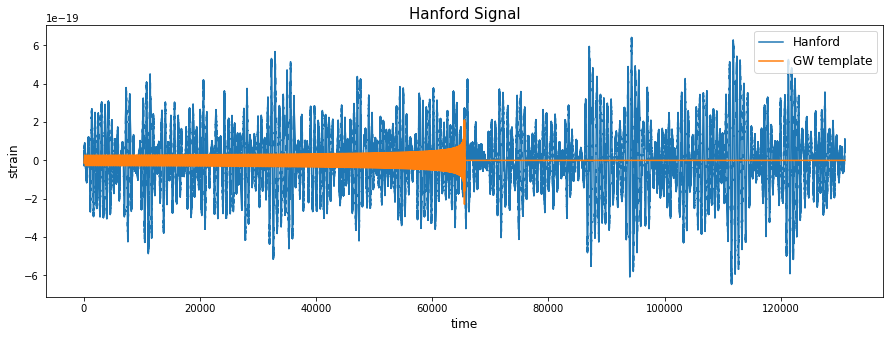

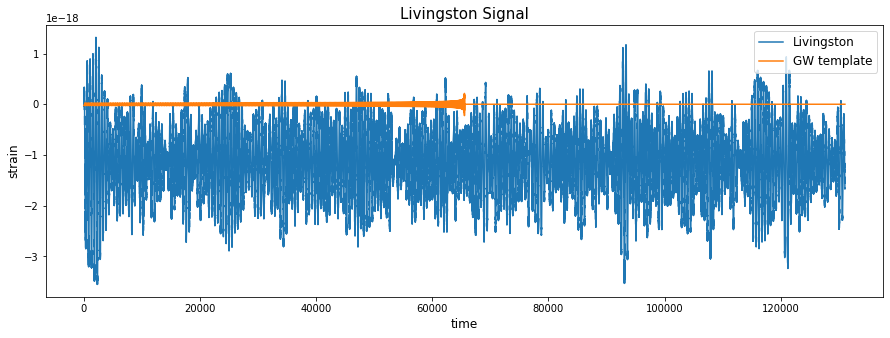

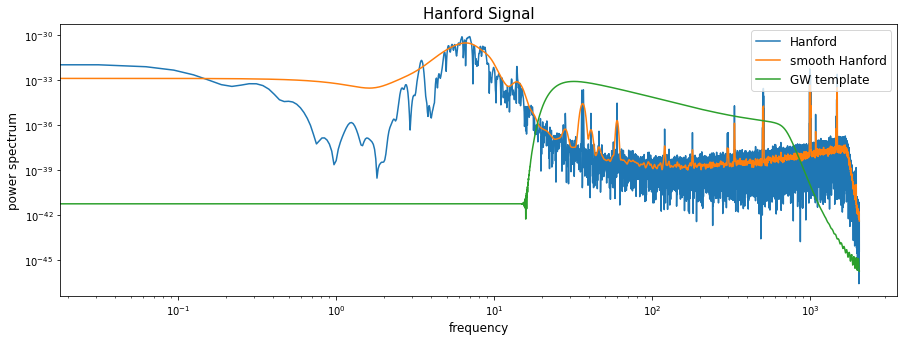

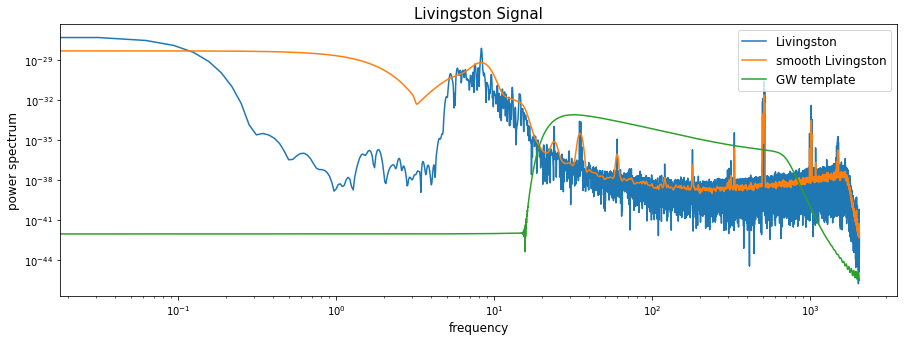

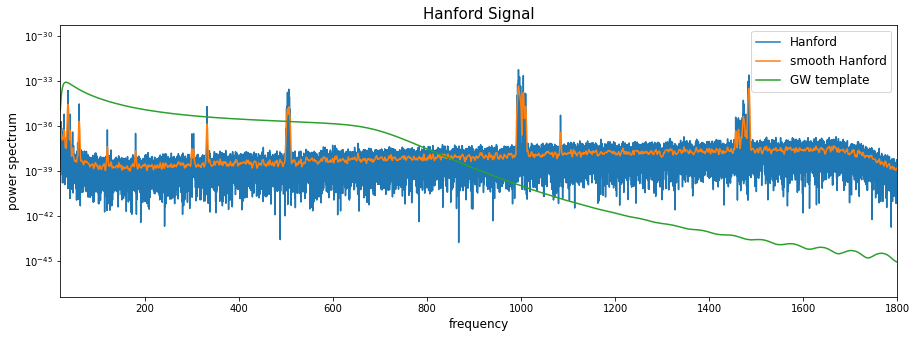

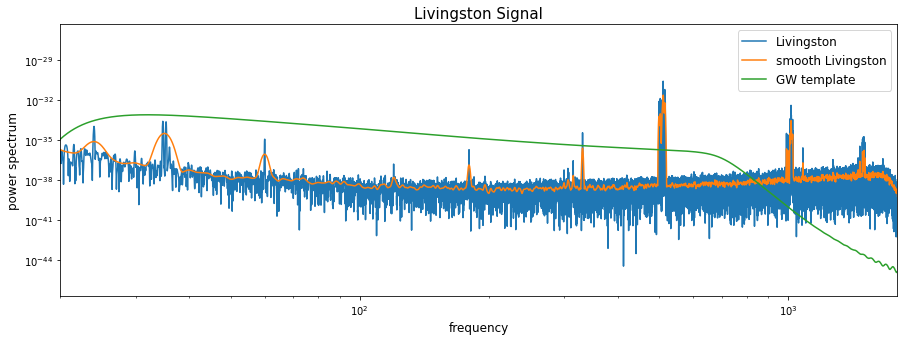

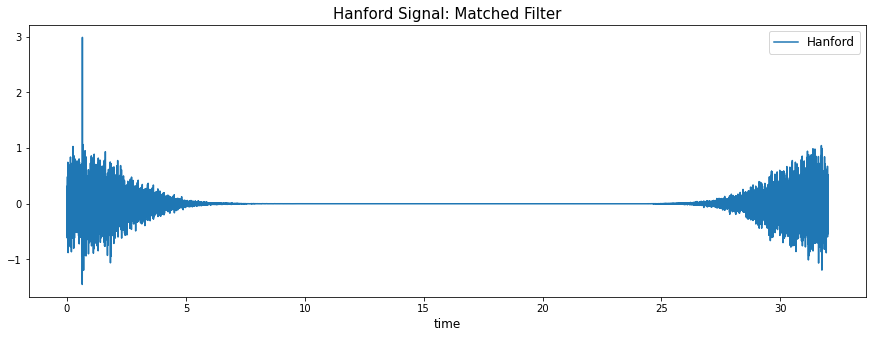

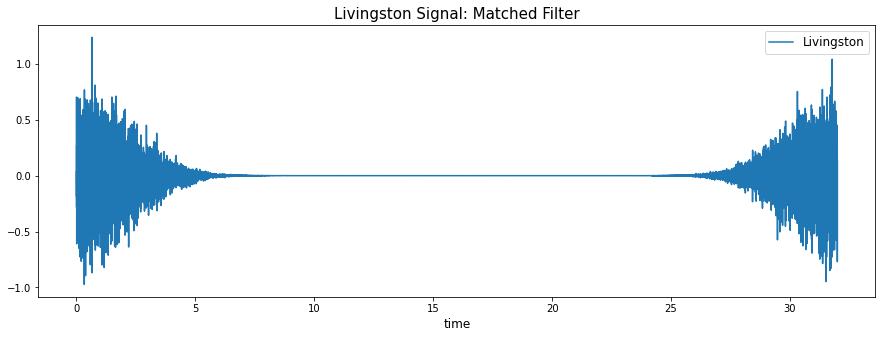

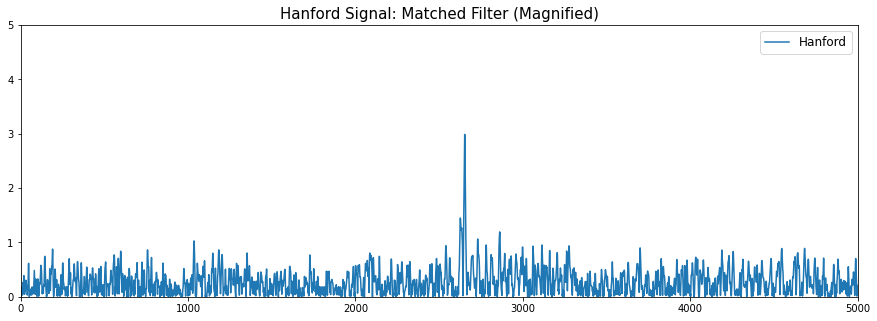

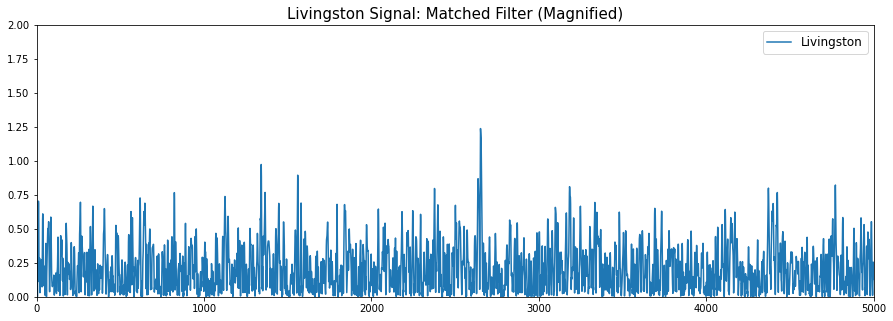

In [508]:

#plotting: data
plt.plot(H_strain, label='Hanford')
plt.plot(th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.ylabel("strain",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

plt.plot(L_strain, label='Livingston')
plt.plot(tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.ylabel("strain",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

#plotting: noise model for both data and template

plt.loglog(nu, ps_win_H, label='Hanford')
plt.loglog(nu, noise_H, label='smooth Hanford')
plt.loglog(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

plt.loglog(nu, ps_win_L, label='Livingston')
plt.loglog(nu, noise_L, label='smooth Livingston')
plt.loglog(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

#plotting: cut-off
plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, noise_H, label='smooth Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.loglog(nu, noise_L, label='smooth Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

#plotting: matched filter
plt.plot(t, mf_H, label='Hanford')
plt.title('Hanford Signal: Matched Filter', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

plt.plot(t, mf_L, label='Livingston')
plt.title('Livingston Signal: Matched Filter', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

#plotting: matched filter magnify!
plt.plot(abs_mf_H, label='Hanford')
plt.title('Hanford Signal: Matched Filter (Magnified)', fontsize = 15, loc='center')
plt.legend(loc = 1, fontsize = 12)
plt.axis([0,5000,0,5])
plt.show()

plt.plot(abs_mf_L, label='Livingston')
plt.title('Livingston Signal: Matched Filter (Magnified)', fontsize = 15, loc='center')
plt.legend(loc = 1, fontsize = 12)
plt.axis([0,5000,0,2])
plt.show()

# Event: LVT1510127

In [509]:
#[ LVT1510127 Data: Hanford, Livingston, template ]

#fnames=glob.glob("[HL]-*.hdf5")
#fname=fnames[0]
fname_H='LOSC_Event_tutorial\H-H1_LOSC_4_V2-1128678884-32.hdf5'
print('reading file ',fname_H)
H_strain,H_dt,H_utc=read_file(fname_H)

#th,tl=read_template('GW150914_4_template.hdf5')
template_name='LOSC_Event_tutorial\LVT151012_4_template.hdf5'
th,tl=read_template(template_name)

fname_L='LOSC_Event_tutorial\L-L1_LOSC_4_V2-1128678884-32.hdf5'
print('reading file ',fname_L)
L_strain,L_dt,L_utc=read_file(fname_L)

reading file  LOSC_Event_tutorial\H-H1_LOSC_4_V2-1128678884-32.hdf5
reading file  LOSC_Event_tutorial\L-L1_LOSC_4_V2-1128678884-32.hdf5


In [513]:
print('Are arrays equivalent in length?')
print('time:',H_dt == L_dt)
print('strain:',len(H_strain) == len(L_strain))
print('')

#[ Calculate ]

#Dolph-Chebyshev
window = win2
#Hanford
win_H_strain_ft = np.fft.rfft(window*H_strain)
win_th_ft = np.fft.rfft(window*th)
ps_win_H = np.abs(win_H_strain_ft)**2
ps_win_th = np.abs(win_th_ft)**2

#Livingston
win_L_strain_ft = np.fft.rfft(window*L_strain)
win_tl_ft = np.fft.rfft(window*tl)
ps_win_L = np.abs(win_L_strain_ft)**2
ps_win_tl = np.abs(win_tl_ft)**2

#smoothing
noise_H = gaussian_filter(ps_win_H, 25)
noise_L = gaussian_filter(ps_win_L, 25)

nu = np.fft.rfftfreq(arr_len, H_dt) #frequency nu
t = np.arange(0, arr_len)*H_dt #time t

#[ Whitening and Matched Filtering ]

#Hanford
#whiten
gluta_H_strain_ft = win_H_strain_ft/np.sqrt(noise_H)
gluta_th_ft = win_th_ft/np.sqrt(noise_H)
#matched filter
mf_H_ft = np.conj(gluta_th_ft).T*(gluta_H_strain_ft)
mf_H = np.fft.irfft(mf_H_ft)
abs_mf_H = np.abs(mf_H)

#Livingston
#whiten
gluta_L_strain_ft = win_L_strain_ft/np.sqrt(noise_L)
gluta_tl_ft = win_tl_ft/np.sqrt(noise_L)
#matched filter
mf_L_ft = np.conj(gluta_tl_ft).T*(gluta_L_strain_ft)
mf_L = np.fft.irfft(mf_L_ft)
abs_mf_L = np.abs(mf_L)

gluta_th = np.fft.irfft(gluta_th_ft, arr_len)
gluta_tl = np.fft.irfft(gluta_tl_ft, arr_len)
#noise
sig_H = np.sqrt(np.mean(gluta_th**2))
sig_L = np.sqrt(np.mean(gluta_tl**2))
#signal-to-noise ratio
snr_H = abs_mf_H/sig_H
snr_L = abs_mf_L/sig_L

print('Analytic')
print('Hanford Signal')
print("estimated noise: %.2e" % sig_H)
print("signal-to-noise ratio: %.2f" % (np.max(snr_H)))
print('Livingston Signal')
print("estimated noise: %.2e" % (sig_L))
print("signal-to-noise ratio: %.2f" % (np.max(snr_L)))
print('')

#Scatter
#taking the rms from 2000 to 5000 (after the signal)

scat_sig_H = np.std(mf_H[2000:5000])
scat_sig_L = np.std(mf_L[2000:5000])

scat_snr_H = abs_mf_H/scat_sig_H
scat_snr_L = abs_mf_L/scat_sig_L

print('Scatter')
print('Hanford Signal')
print("estimated noise: %.2e" % scat_sig_H)
print("signal-to-noise ratio: %.2f" % (np.max(scat_snr_H)))
print('Livingston Signal')
print("estimated noise: %.2e" % (scat_sig_L))
print("signal-to-noise ratio: %.2f" % (np.max(scat_snr_L)))
print('')

#power spectrum of whitened template
ps_gluta_th = np.abs(gluta_th_ft)**2
ps_gluta_tl = np.abs(gluta_tl_ft)**2
cum_ps_gluta_th = np.cumsum(ps_gluta_th)
cum_ps_gluta_tl = np.cumsum(ps_gluta_tl)
#Finding the half
H_half_nu_index = np.argwhere(cum_ps_gluta_th>=((np.max(cum_ps_gluta_th)-np.min(cum_ps_gluta_th))/2))[0][0]
L_half_nu_index = np.argwhere(cum_ps_gluta_tl>=((np.max(cum_ps_gluta_tl)-np.min(cum_ps_gluta_tl))/2))[0][0]
print('Half frequency (Hanford):',round(nu[H_half_nu_index]),'Hz')
print('Half frequency (Livingston):',round(nu[L_half_nu_index]),'Hz')
print('')

#Time
arrival_H = t[np.argwhere(abs_mf_H == np.max(abs_mf_H))[0][0]]
arrival_L = t[np.argwhere(abs_mf_L == np.max(abs_mf_L))[0][0]]
time_diff = arrival_H - arrival_L
print('Arrival time difference is',round((time_diff),4),'seconds.')
print('This is about ', round(((1 - time_diff/0.01)*100),1) , '% deviation from the calculated time.')

Are arrays equivalent in length?
time: True
strain: True

Analytic
Hanford Signal
estimated noise: 2.00e-01
signal-to-noise ratio: 18.49
Livingston Signal
estimated noise: 1.88e-01
signal-to-noise ratio: 14.46

Scatter
Hanford Signal
estimated noise: 5.28e-01
signal-to-noise ratio: 6.99
Livingston Signal
estimated noise: 4.79e-01
signal-to-noise ratio: 5.67

Half frequency (Hanford): 94.0 Hz
Half frequency (Livingston): 101.0 Hz

Arrival time difference is -0.002 seconds.
This is about  119.5 % deviation from the calculated time.


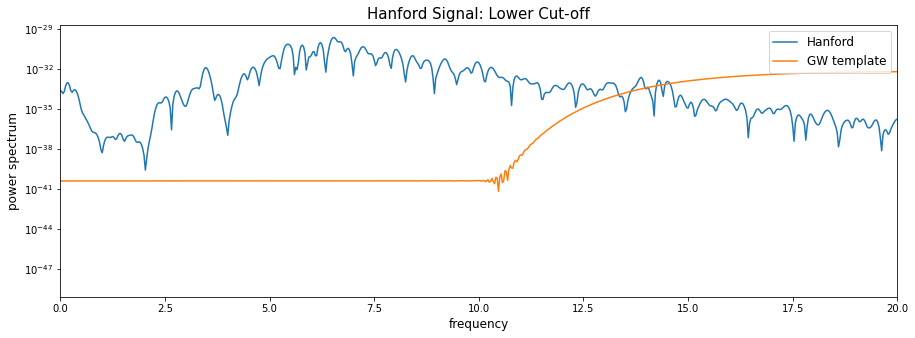

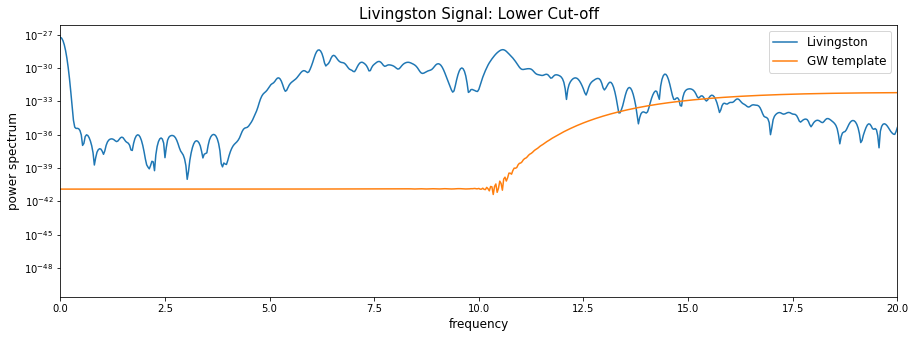

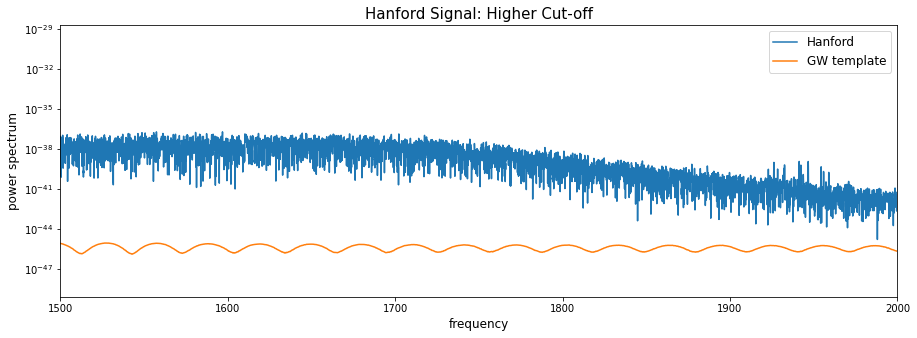

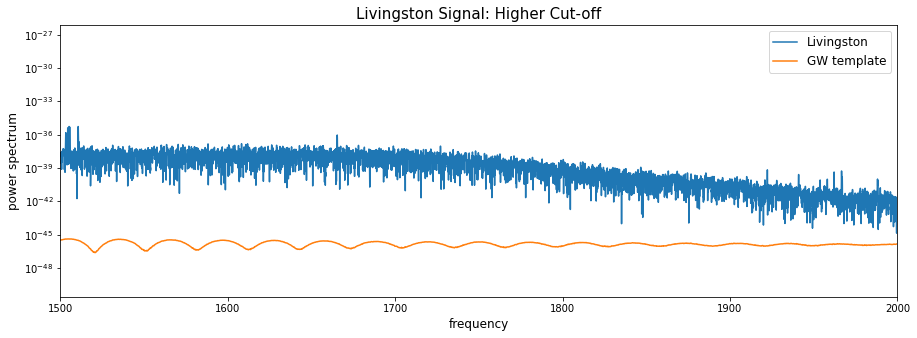

lower frequency: 480
higher frequency: 57600


In [511]:
#plotting: finding the which to cut-off
plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal: Lower Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(1500,2000)
plt.xlim(0,20)
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal: Lower Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(1500,2000)
plt.xlim(0,20)
plt.show()

plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal: Higher Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(1500,2000)
#plt.xlim(0,20)
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal: Higher Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(1500,2000)
#plt.xlim(0,20)
plt.show()
lower_freq = np.argmin(abs(nu-15))
higher_freq = np.argmin(abs(nu - 1800))
print('lower frequency:',lower_freq)
print('higher frequency:',higher_freq)

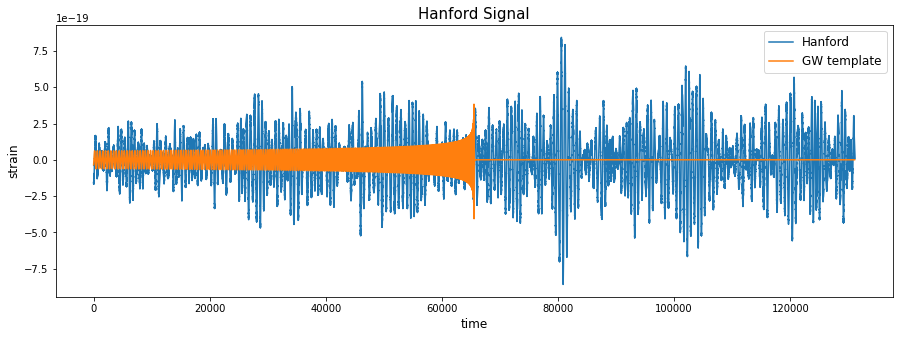

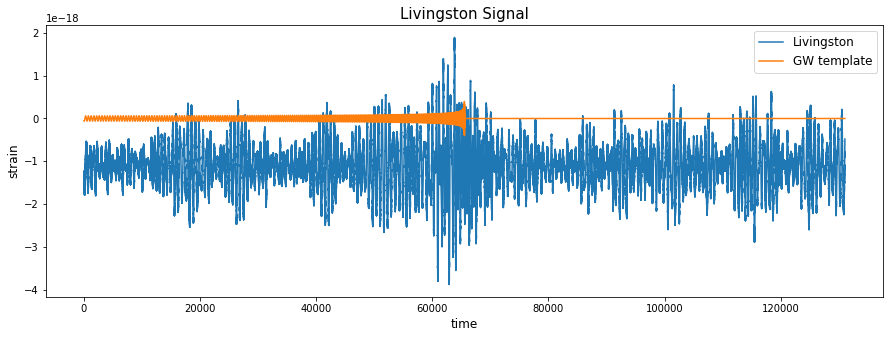

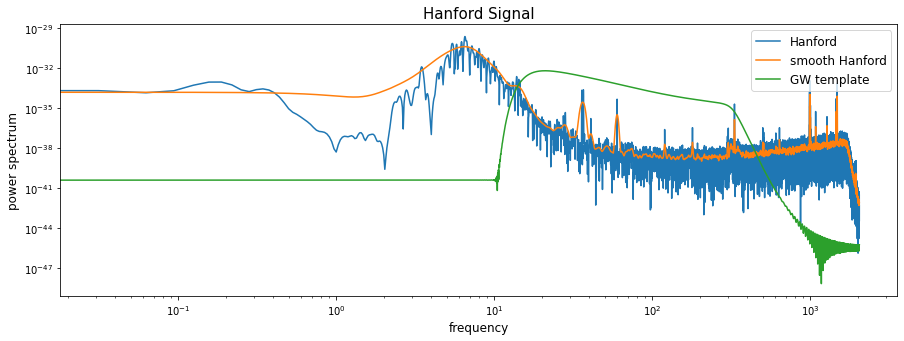

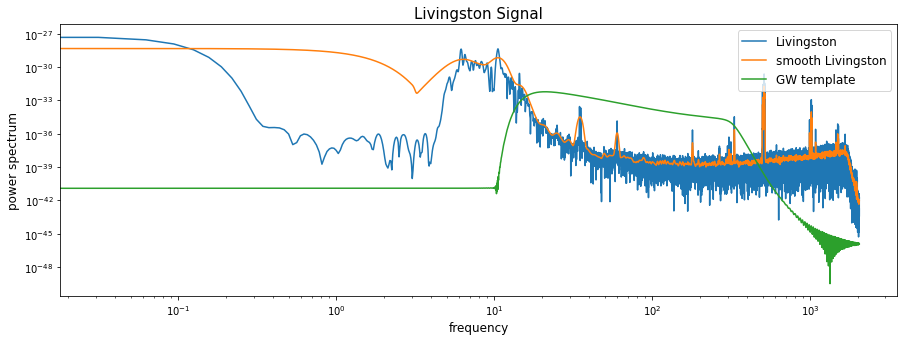

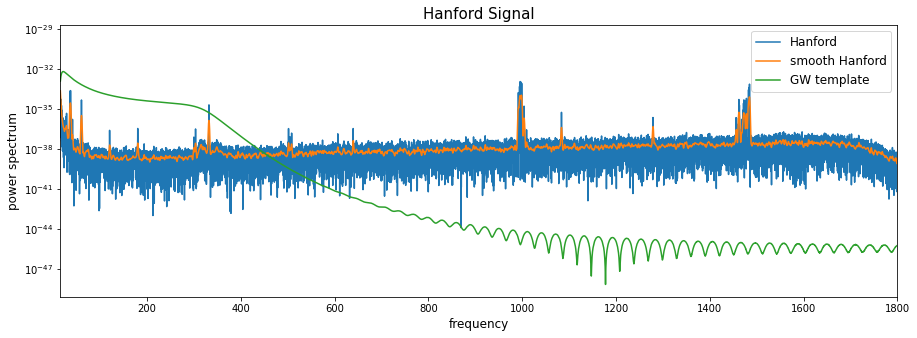

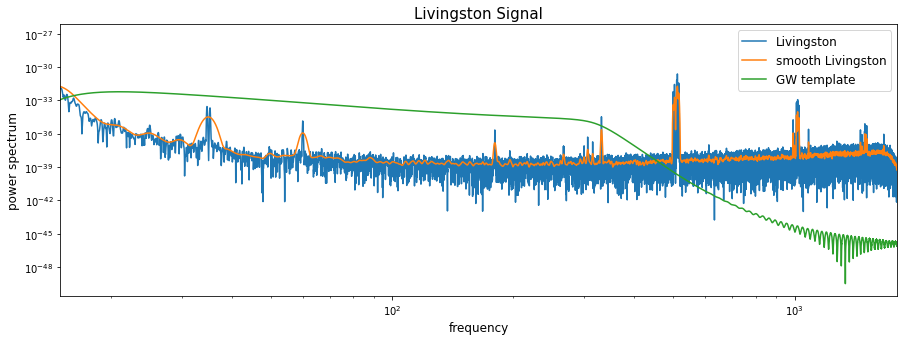

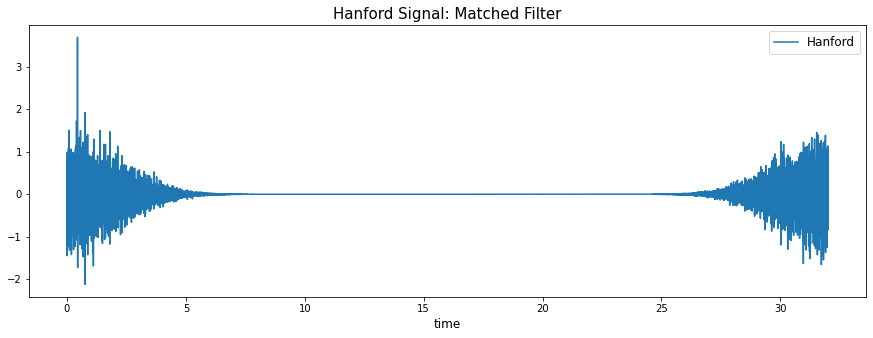

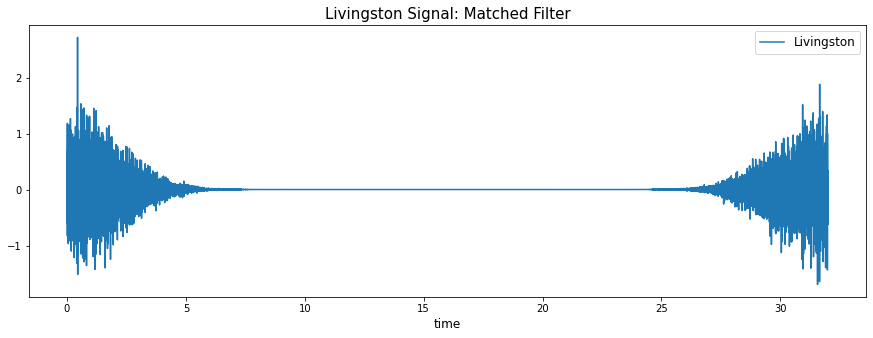

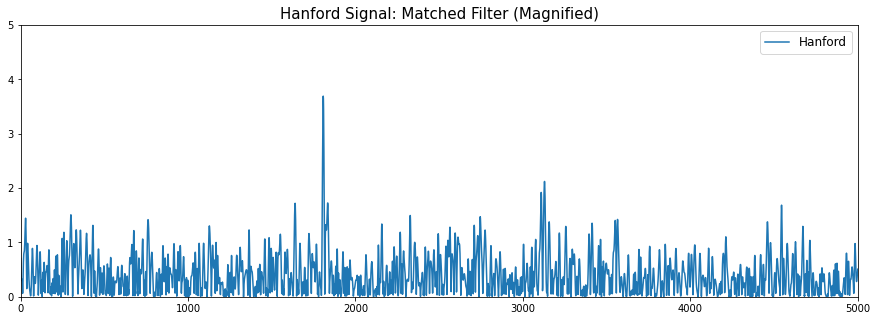

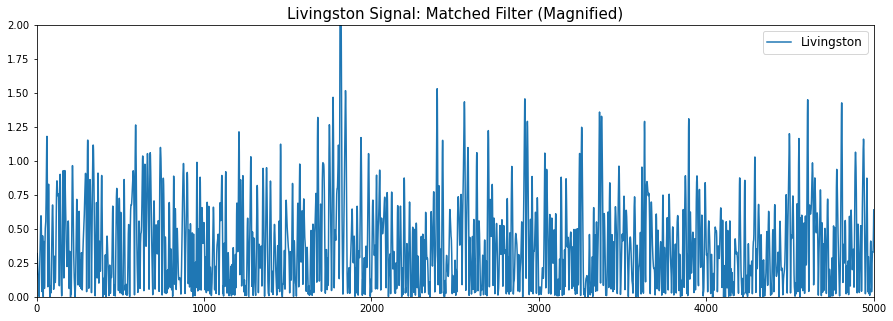

In [512]:

#plotting: data
plt.plot(H_strain, label='Hanford')
plt.plot(th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.ylabel("strain",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

plt.plot(L_strain, label='Livingston')
plt.plot(tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.ylabel("strain",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

#plotting: noise model for both data and template

plt.loglog(nu, ps_win_H, label='Hanford')
plt.loglog(nu, noise_H, label='smooth Hanford')
plt.loglog(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

plt.loglog(nu, ps_win_L, label='Livingston')
plt.loglog(nu, noise_L, label='smooth Livingston')
plt.loglog(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

#plotting: cut-off
plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, noise_H, label='smooth Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.loglog(nu, noise_L, label='smooth Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

#plotting: matched filter
plt.plot(t, mf_H, label='Hanford')
plt.title('Hanford Signal: Matched Filter', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

plt.plot(t, mf_L, label='Livingston')
plt.title('Livingston Signal: Matched Filter', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

#plotting: matched filter magnify!
plt.plot(abs_mf_H, label='Hanford')
plt.title('Hanford Signal: Matched Filter (Magnified)', fontsize = 15, loc='center')
plt.legend(loc = 1, fontsize = 12)
plt.axis([0,5000,0,5])
plt.show()

plt.plot(abs_mf_L, label='Livingston')
plt.title('Livingston Signal: Matched Filter (Magnified)', fontsize = 15, loc='center')
plt.legend(loc = 1, fontsize = 12)
plt.axis([0,5000,0,2])
plt.show()

# Event: GW170104

In [514]:
#[ GW170104 Data: Hanford, Livingston, template ]

#fnames=glob.glob("[HL]-*.hdf5")
#fname=fnames[0]
fname_H='LOSC_Event_tutorial\H-H1_LOSC_4_V1-1167559920-32.hdf5'
print('reading file ',fname_H)
H_strain,H_dt,H_utc=read_file(fname_H)

#th,tl=read_template('GW150914_4_template.hdf5')
template_name='LOSC_Event_tutorial\GW170104_4_template.hdf5'
th,tl=read_template(template_name)

fname_L='LOSC_Event_tutorial\L-L1_LOSC_4_V1-1167559920-32.hdf5'
print('reading file ',fname_L)
L_strain,L_dt,L_utc=read_file(fname_L)

reading file  LOSC_Event_tutorial\H-H1_LOSC_4_V1-1167559920-32.hdf5
reading file  LOSC_Event_tutorial\L-L1_LOSC_4_V1-1167559920-32.hdf5


In [519]:
print('Are arrays equivalent in length?')
print('time:',H_dt == L_dt)
print('strain:',len(H_strain) == len(L_strain))
print('')

#[ Calculate ]

#Dolph-Chebyshev
window = win2
#Hanford
win_H_strain_ft = np.fft.rfft(window*H_strain)
win_th_ft = np.fft.rfft(window*th)
ps_win_H = np.abs(win_H_strain_ft)**2
ps_win_th = np.abs(win_th_ft)**2

#Livingston
win_L_strain_ft = np.fft.rfft(window*L_strain)
win_tl_ft = np.fft.rfft(window*tl)
ps_win_L = np.abs(win_L_strain_ft)**2
ps_win_tl = np.abs(win_tl_ft)**2

#smoothing
noise_H = gaussian_filter(ps_win_H, 25)
noise_L = gaussian_filter(ps_win_L, 25)

nu = np.fft.rfftfreq(arr_len, H_dt) #frequency nu
t = np.arange(0, arr_len)*H_dt #time t

#[ Whitening and Matched Filtering ]

#Hanford
#whiten
gluta_H_strain_ft = win_H_strain_ft/np.sqrt(noise_H)
gluta_th_ft = win_th_ft/np.sqrt(noise_H)
#matched filter
mf_H_ft = np.conj(gluta_th_ft).T*(gluta_H_strain_ft)
mf_H = np.fft.irfft(mf_H_ft)
abs_mf_H = np.abs(mf_H)

#Livingston
#whiten
gluta_L_strain_ft = win_L_strain_ft/np.sqrt(noise_L)
gluta_tl_ft = win_tl_ft/np.sqrt(noise_L)
#matched filter
mf_L_ft = np.conj(gluta_tl_ft).T*(gluta_L_strain_ft)
mf_L = np.fft.irfft(mf_L_ft)
abs_mf_L = np.abs(mf_L)

gluta_th = np.fft.irfft(gluta_th_ft, arr_len)
gluta_tl = np.fft.irfft(gluta_tl_ft, arr_len)
#noise
sig_H = np.sqrt(np.mean(gluta_th**2))
sig_L = np.sqrt(np.mean(gluta_tl**2))
#signal-to-noise ratio
snr_H = abs_mf_H/sig_H
snr_L = abs_mf_L/sig_L

print('Analytic')
print('Hanford Signal')
print("estimated noise: %.2e" % sig_H)
print("signal-to-noise ratio: %.2f" % (np.max(snr_H)))
print('Livingston Signal')
print("estimated noise: %.2e" % (sig_L))
print("signal-to-noise ratio: %.2f" % (np.max(snr_L)))
print('')

#Scatter
#taking the rms from 2000 to 5000 (after the signal)

scat_sig_H = np.std(mf_H[3000:6000])
scat_sig_L = np.std(mf_L[3000:6000])

scat_snr_H = abs_mf_H/scat_sig_H
scat_snr_L = abs_mf_L/scat_sig_L

print('Scatter')
print('Hanford Signal')
print("estimated noise: %.2e" % scat_sig_H)
print("signal-to-noise ratio: %.2f" % (np.max(scat_snr_H)))
print('Livingston Signal')
print("estimated noise: %.2e" % (scat_sig_L))
print("signal-to-noise ratio: %.2f" % (np.max(scat_snr_L)))
print('')

#power spectrum of whitened template
ps_gluta_th = np.abs(gluta_th_ft)**2
ps_gluta_tl = np.abs(gluta_tl_ft)**2
cum_ps_gluta_th = np.cumsum(ps_gluta_th)
cum_ps_gluta_tl = np.cumsum(ps_gluta_tl)
#Finding the half
H_half_nu_index = np.argwhere(cum_ps_gluta_th>=((np.max(cum_ps_gluta_th)-np.min(cum_ps_gluta_th))/2))[0][0]
L_half_nu_index = np.argwhere(cum_ps_gluta_tl>=((np.max(cum_ps_gluta_tl)-np.min(cum_ps_gluta_tl))/2))[0][0]
print('Half frequency (Hanford):',round(nu[H_half_nu_index]),'Hz')
print('Half frequency (Livingston):',round(nu[L_half_nu_index]),'Hz')
print('')

#Time
arrival_H = t[np.argwhere(abs_mf_H == np.max(abs_mf_H))[0][0]]
arrival_L = t[np.argwhere(abs_mf_L == np.max(abs_mf_L))[0][0]]
time_diff = arrival_H - arrival_L
print('Arrival time difference is',round((time_diff),4),'seconds.')
print('This is about ', round(((1 - time_diff/0.01)*100),1) , '% deviation from the calculated time.')

Are arrays equivalent in length?
time: True
strain: True

Analytic
Hanford Signal
estimated noise: 2.64e-01
signal-to-noise ratio: 21.47
Livingston Signal
estimated noise: 3.38e-01
signal-to-noise ratio: 18.50

Scatter
Hanford Signal
estimated noise: 6.09e-01
signal-to-noise ratio: 9.29
Livingston Signal
estimated noise: 8.25e-01
signal-to-noise ratio: 7.59

Half frequency (Hanford): 100.0 Hz
Half frequency (Livingston): 78.0 Hz

Arrival time difference is -0.0046 seconds.
This is about  146.4 % deviation from the calculated time.


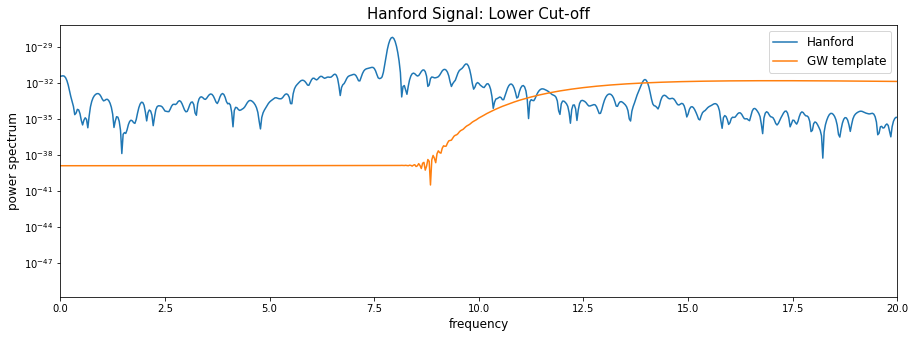

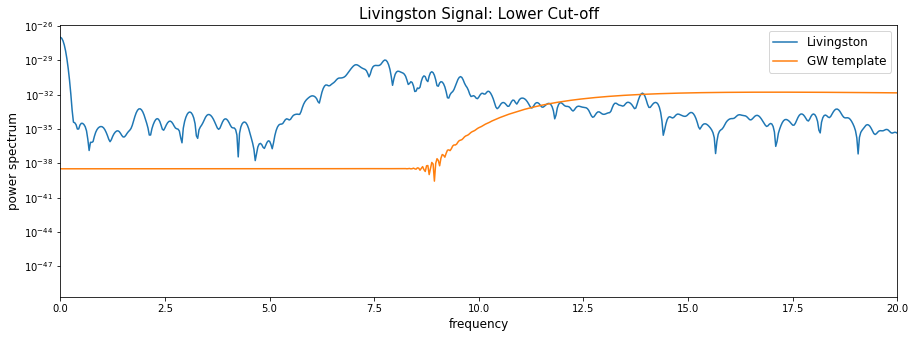

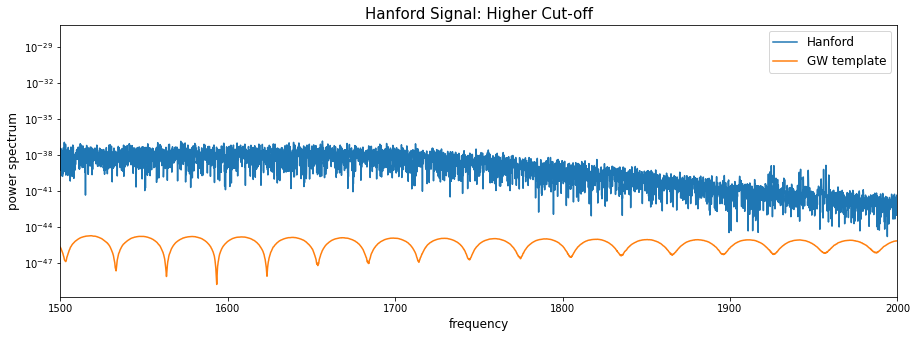

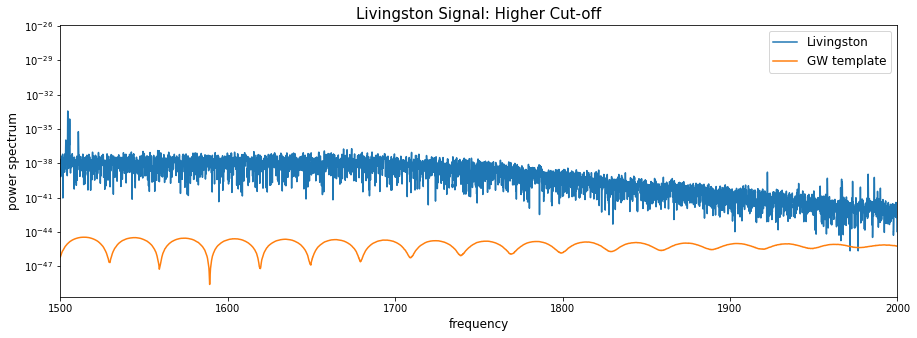

lower frequency: 480
higher frequency: 57600


In [516]:
#plotting: finding the which to cut-off
plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal: Lower Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(1500,2000)
plt.xlim(0,20)
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal: Lower Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(1500,2000)
plt.xlim(0,20)
plt.show()

plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal: Higher Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(1500,2000)
#plt.xlim(0,20)
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal: Higher Cut-off', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(1500,2000)
#plt.xlim(0,20)
plt.show()
lower_freq = np.argmin(abs(nu-15))
higher_freq = np.argmin(abs(nu - 1800))
print('lower frequency:',lower_freq)
print('higher frequency:',higher_freq)

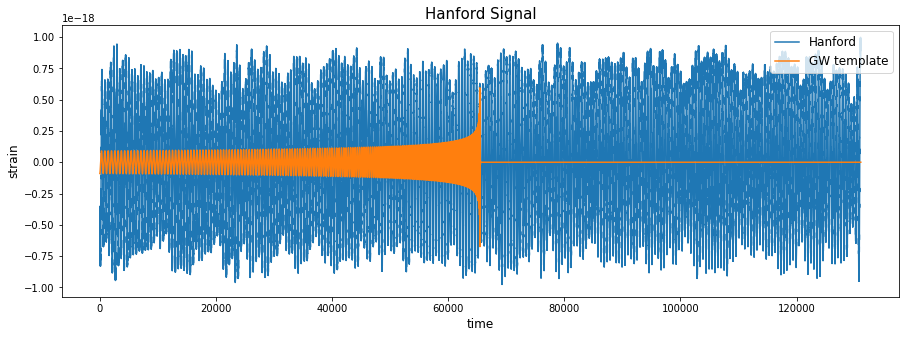

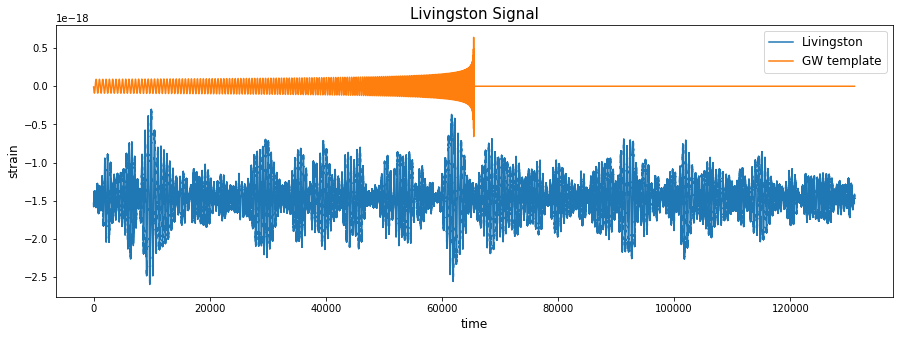

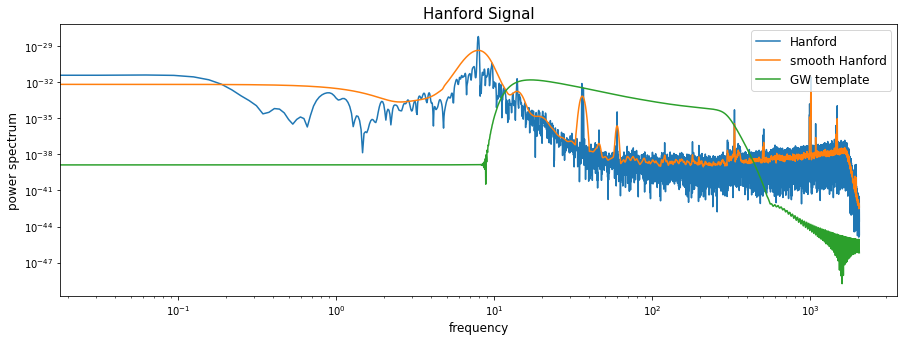

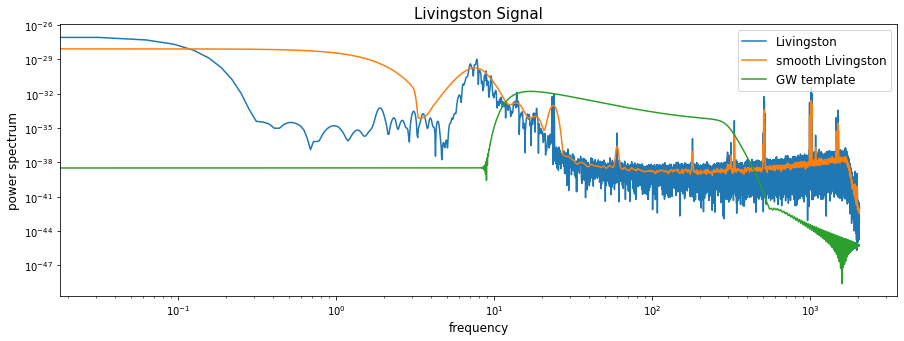

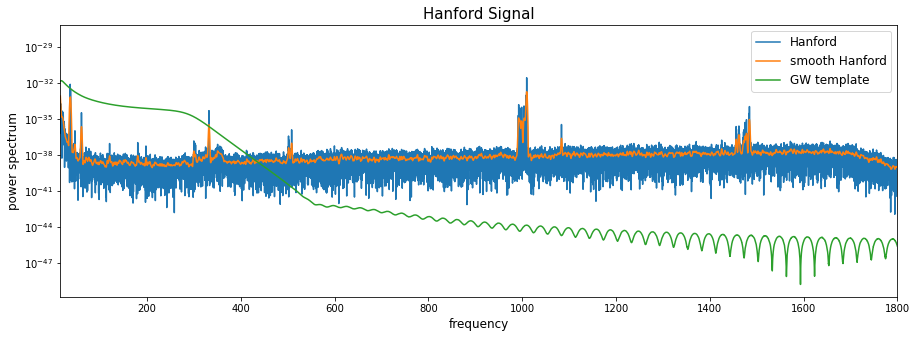

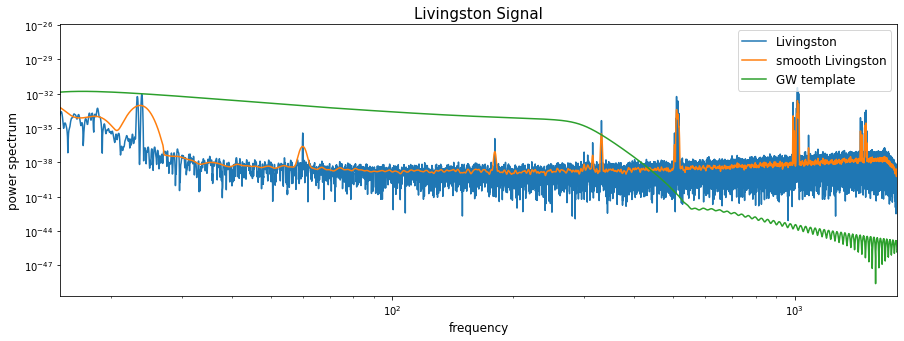

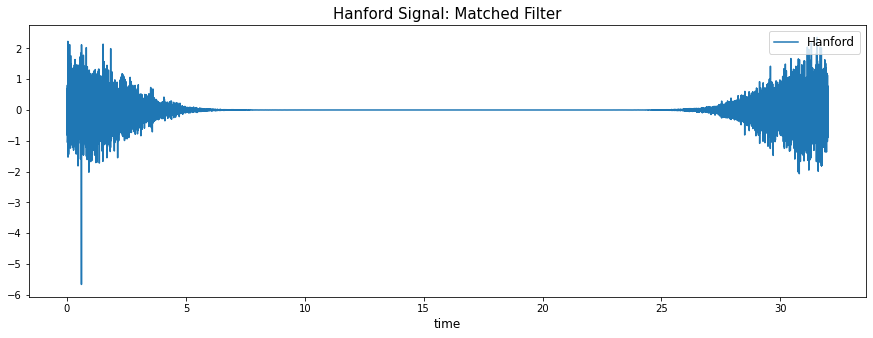

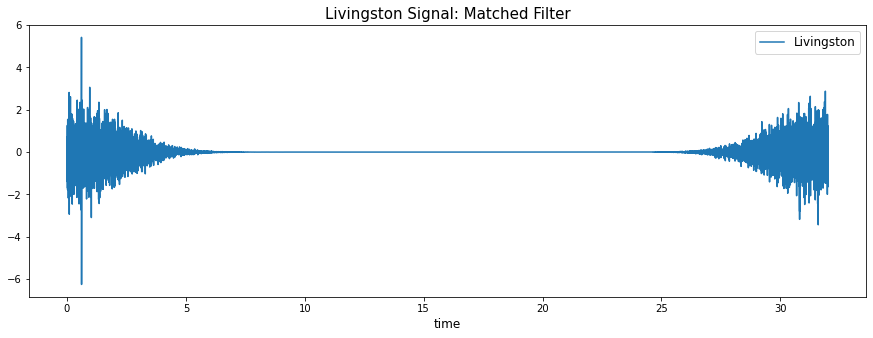

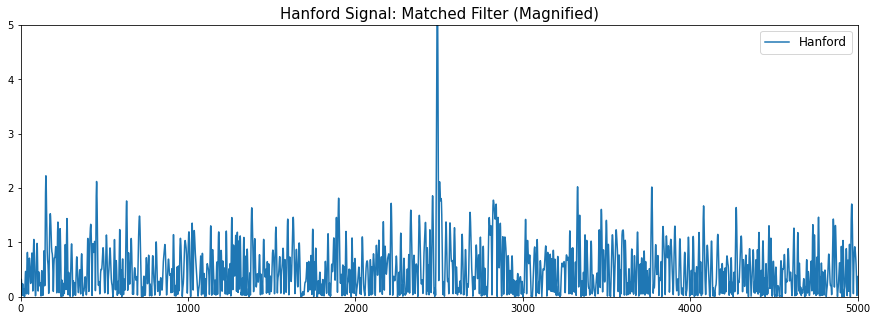

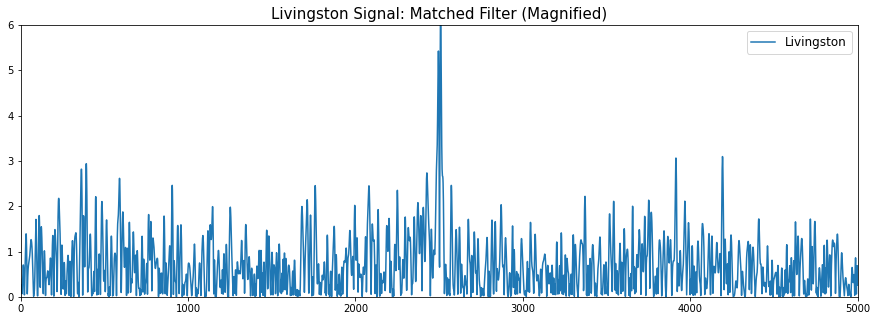

In [518]:

#plotting: data
plt.plot(H_strain, label='Hanford')
plt.plot(th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.ylabel("strain",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

plt.plot(L_strain, label='Livingston')
plt.plot(tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.ylabel("strain",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

#plotting: noise model for both data and template

plt.loglog(nu, ps_win_H, label='Hanford')
plt.loglog(nu, noise_H, label='smooth Hanford')
plt.loglog(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

plt.loglog(nu, ps_win_L, label='Livingston')
plt.loglog(nu, noise_L, label='smooth Livingston')
plt.loglog(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.show()

#plotting: cut-off
plt.semilogy(nu, ps_win_H, label='Hanford')
plt.semilogy(nu, noise_H, label='smooth Hanford')
plt.semilogy(nu, ps_win_th, label = 'GW template')
plt.title('Hanford Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

plt.semilogy(nu, ps_win_L, label='Livingston')
plt.loglog(nu, noise_L, label='smooth Livingston')
plt.semilogy(nu, ps_win_tl, label = 'GW template')
plt.title('Livingston Signal', fontsize = 15, loc='center')
plt.xlabel("frequency",fontsize=12)
plt.ylabel("power spectrum",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

#plotting: matched filter
plt.plot(t, mf_H, label='Hanford')
plt.title('Hanford Signal: Matched Filter', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

plt.plot(t, mf_L, label='Livingston')
plt.title('Livingston Signal: Matched Filter', fontsize = 15, loc='center')
plt.xlabel("time",fontsize=12)
plt.legend(loc = 1, fontsize = 12)
#plt.xlim(nu[lower_freq],nu[higher_freq])
plt.show()

#plotting: matched filter magnify!
plt.plot(abs_mf_H, label='Hanford')
plt.title('Hanford Signal: Matched Filter (Magnified)', fontsize = 15, loc='center')
plt.legend(loc = 1, fontsize = 12)
plt.axis([0,5000,0,5])
plt.show()

plt.plot(abs_mf_L, label='Livingston')
plt.title('Livingston Signal: Matched Filter (Magnified)', fontsize = 15, loc='center')
plt.legend(loc = 1, fontsize = 12)
plt.axis([0,5000,0,6])
plt.show()

# sanity check

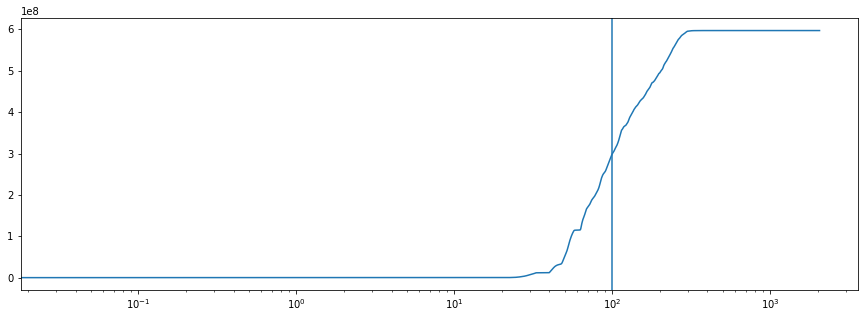

In [526]:
plt.semilogx(nu, cum_ps_gluta_th)
plt.axvline(nu[H_half_nu_index])
plt.show()